# Projet de Machine Learning

## Introduction

Le notebook qui suit porte sur le projet de 4ème année en Machine Learning. Le but est d'améliorer la prévision de l'émission en CO2. Le jeu de données provient d'un concours Kaggle, nommé "global-data-on-sustainable-energy.csv"

On importe nos librairies ainsi que notre jeu de données

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:

df= pd.read_csv("global-data-on-sustainable-energy (1).csv")
df.head()


Entity    Year  Access-to-electricity  \
0  Afghanistan  2000.0               1.613591   
1  Afghanistan  2001.0               4.074574   
2  Afghanistan  2002.0               9.409158   
3  Afghanistan  2003.0              14.738506   
4  Afghanistan  2004.0              20.064968   

   Access-to-clean-fuels-for-cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial-flows-to-developing-countries  \
0                                  20000.0   
1                                 130000.0   
2                                3950000.0   
3                               25970000.0   
4                                      NaN   

   Renewable-energy-share-in-the-total-final-energy-consumption  \
0                                              44.99              
1                                              45.60              
2                                              37.83              
3                                              36.66              
4                                              44.24              

   Electricity-from-fossil-fuels  Electricity-from-nuclear  \
0                           0.16                       0.0   
1                           0.09                       0.0   
2                           0.13                       0.0   
3                           0.31                       0.0   
4                           0.33                       0.0   

   Electricity-from-renewables  ...  Primary-energy-consumption-per-capita  \
0                         0.31  ...                              302.59482   
1                         0.50  ...                              236.89185   
2                         0.56  ...                              210.86215   
3                         0.63  ...                              229.96822   
4                         0.56  ...                              204.23125   

   Energy-intensity-level-of-primary-energy  \
0                                      1.64   
1                                      1.74   
2                                      1.40   
3                                      1.40   
4                                      1.20   

   Value_co2_emissions_kt_by_country  Renewables  gdp_growth  gdp_per_capita  \
0                         760.000000         NaN         NaN             NaN   
1                         730.000000         NaN         NaN             NaN   
2                        1029.999971         NaN         NaN      179.426579   
3                        1220.000029         NaN    8.832278      190.683814   
4                        1029.999971         NaN    1.414118      211.382074   

   Density.n.P.Km2  Land-Area  Latitude  Longitude  
0             60.0   652230.0  33.93911  67.709953  
1             60.0   652230.0  33.93911  67.709953  
2             60.0   652230.0  33.93911  67.709953  
3             60.0   652230.0  33.93911  67.709953  
4             60.0   652230.0  33.93911  67.709953  

[5 rows x 21 columns]

In [6]:
df.columns

Index(['Entity', 'Year', 'Access-to-electricity',
       'Access-to-clean-fuels-for-cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial-flows-to-developing-countries',
       'Renewable-energy-share-in-the-total-final-energy-consumption',
       'Electricity-from-fossil-fuels', 'Electricity-from-nuclear',
       'Electricity-from-renewables', 'Low-carbon-electricity',
       'Primary-energy-consumption-per-capita',
       'Energy-intensity-level-of-primary-energy',
       'Value_co2_emissions_kt_by_country', 'Renewables', 'gdp_growth',
       'gdp_per_capita', 'Density.n.P.Km2', 'Land-Area', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
df.shape

(3649, 21)

In [5]:
df.dtypes

Entity                                                           object
Year                                                            float64
Access-to-electricity                                           float64
Access-to-clean-fuels-for-cooking                               float64
Renewable-electricity-generating-capacity-per-capita            float64
Financial-flows-to-developing-countries                         float64
Renewable-energy-share-in-the-total-final-energy-consumption    float64
Electricity-from-fossil-fuels                                   float64
Electricity-from-nuclear                                        float64
Electricity-from-renewables                                     float64
Low-carbon-electricity                                          float64
Primary-energy-consumption-per-capita                           float64
Energy-intensity-level-of-primary-energy                        float64
Value_co2_emissions_kt_by_country                               

Les variables ne sont pas toutes quantitatives, puisque les variavles "Entity", "Density" et "Year" sont qualitatives. Ceci est à retenir avant d'effectuer une analyse de nos données. 

In [6]:
df['Year']=pd.DataFrame(df['Year'],dtype="category")

In [7]:
df['Entity']=pd.DataFrame(df['Entity'],dtype="category")

In [8]:
df.dtypes

Entity                                                          category
Year                                                            category
Access-to-electricity                                            float64
Access-to-clean-fuels-for-cooking                                float64
Renewable-electricity-generating-capacity-per-capita             float64
Financial-flows-to-developing-countries                          float64
Renewable-energy-share-in-the-total-final-energy-consumption     float64
Electricity-from-fossil-fuels                                    float64
Electricity-from-nuclear                                         float64
Electricity-from-renewables                                      float64
Low-carbon-electricity                                           float64
Primary-energy-consumption-per-capita                            float64
Energy-intensity-level-of-primary-energy                         float64
Value_co2_emissions_kt_by_country                  

In [62]:
#Nous convertissons la variable 'Density' en numérique en faisant attention de remplacer les virgules par des points
df["Density.n.P.Km2"] = df["Density.n.P.Km2"].str.replace(",", " ").astype(float64)


AttributeError: Can only use .str accessor with string values!

Nous observons bien nos 3649 observations et nos 21 variables.

La commande qui va suivre nous donne un summary de nos données. Pour chaque variable, elle nous donne, la moyenne, le 1er quantile, le 2e etc. De plus, elle nous donne le nombre de valeurs à chaque variable. 

In [9]:
df.describe().T

count          mean  \
Access-to-electricity                               3534.0  7.857143e+01   
Access-to-clean-fuels-for-cooking                   3375.0  6.273046e+01   
Renewable-electricity-generating-capacity-per-c...  2634.0  1.163074e+02   
Financial-flows-to-developing-countries             1529.0  9.487559e+07   
Renewable-energy-share-in-the-total-final-energ...  3355.0  3.333252e+01   
Electricity-from-fossil-fuels                       3523.0  7.182191e+01   
Electricity-from-nuclear                            3418.0  1.386338e+01   
Electricity-from-renewables                         3523.0  2.467447e+01   
Low-carbon-electricity                              3502.0  3.785518e+01   
Primary-energy-consumption-per-capita               3544.0  2.430030e+04   
Energy-intensity-level-of-primary-energy            3342.0  5.346087e+00   
Value_co2_emissions_kt_by_country                   3121.0  1.642120e+05   
Renewables                                          1470.0  1.231105e+01   
gdp_growth                                          3227.0  3.405803e+00   
gdp_per_capita                                      3262.0  1.311013e+04   
Density.n.P.Km2                                     3543.0  1.410305e+02   
Land-Area                                           3543.0  6.510870e+05   
Latitude                                            3543.0  1.825224e+01   
Longitude                                           3543.0  1.329220e+01   

                                                             std         min  \
Access-to-electricity                               3.049085e+01    1.252269   
Access-to-clean-fuels-for-cooking                   3.907105e+01    0.000000   
Renewable-electricity-generating-capacity-per-c...  2.473496e+02    0.000000   
Financial-flows-to-developing-countries             3.008016e+08    0.000000   
Renewable-energy-share-in-the-total-final-energ...  2.991745e+01    0.000000   
Electricity-from-fossil-fuels                       3.530801e+02    0.000000   
Electricity-from-nuclear                            7.408117e+01    0.000000   
Electricity-from-renewables                         1.058949e+02    0.000000   
Low-carbon-electricity                              3.426946e+01    0.000000   
Primary-energy-consumption-per-capita               3.243254e+04    0.000000   
Energy-intensity-level-of-primary-energy            3.542908e+00    0.110000   
Value_co2_emissions_kt_by_country                   7.855643e+05   10.000000   
Renewables                                          1.508219e+01    0.000000   
gdp_growth                                          5.672809e+00  -62.075920   
gdp_per_capita                                      1.976749e+04  111.927225   
Density.n.P.Km2                                     1.692211e+02    2.000000   
Land-Area                                           1.605362e+06   21.000000   
Latitude                                            2.440376e+01  -40.900557   
Longitude                                           6.649551e+01 -175.198242   

                                                              25%  \
Access-to-electricity                                   58.003070   
Access-to-clean-fuels-for-cooking                       22.500000   
Renewable-electricity-generating-capacity-per-c...       4.245000   
Financial-flows-to-developing-countries             260000.000000   
Renewable-energy-share-in-the-total-final-energ...       7.140000   
Electricity-from-fossil-fuels                            0.280000   
Electricity-from-nuclear                                 0.000000   
Electricity-from-renewables                              0.060000   
Low-carbon-electricity                                   4.988910   
Primary-energy-consumption-per-capita                 3098.846850   
Energy-intensity-level-of-primary-energy                 3.220000   
Value_co2_emissions_kt_by_country                     2000.000000   
Renewables                        

Nous remarquons que les variables possédent des données manquantes, comme par exemple la colonne "Energy intensity level of primary energy" qui en possède 3442 valeurs sur 3649 observations attendues. 

In [10]:
unique_valeurs =df.nunique()
unique_valeurs

Entity                                                           276
Year                                                              21
Access-to-electricity                                           2009
Access-to-clean-fuels-for-cooking                                887
Renewable-electricity-generating-capacity-per-capita            2069
Financial-flows-to-developing-countries                          998
Renewable-energy-share-in-the-total-final-energy-consumption    2554
Electricity-from-fossil-fuels                                   1804
Electricity-from-nuclear                                         547
Electricity-from-renewables                                     1533
Low-carbon-electricity                                          2599
Primary-energy-consumption-per-capita                           3523
Energy-intensity-level-of-primary-energy                        1031
Value_co2_emissions_kt_by_country                               2331
Renewables                        

Nous ne possédons pas 3649 veleurs distinctes pour les variables de notre data Frame, nous possédons donc bien des données dupliquées au sein de chaque variable.

In [11]:
df.isna().sum()

Entity                                                             0
Year                                                             105
Access-to-electricity                                            115
Access-to-clean-fuels-for-cooking                                274
Renewable-electricity-generating-capacity-per-capita            1015
Financial-flows-to-developing-countries                         2120
Renewable-energy-share-in-the-total-final-energy-consumption     294
Electricity-from-fossil-fuels                                    126
Electricity-from-nuclear                                         231
Electricity-from-renewables                                      126
Low-carbon-electricity                                           147
Primary-energy-consumption-per-capita                            105
Energy-intensity-level-of-primary-energy                         307
Value_co2_emissions_kt_by_country                                528
Renewables                        

Nous obtenons le nombre de données maquantes par variable. Nous remarquons que le flux financier "Financial flows", ainsi que que la variable "Renewables" possède beaucoup de données manquantes (2137 données manquantes).

In [12]:
missing_data=df.isna().sum()

px.histogram(x=missing_data.index, y= missing_data.values,labels={'x': 'Variables', 'y': 'Valeurs manquantes'}, title="Représentation des valeurs manquantes selon les variables")

D'après ce graphique, nous remarquons que le jeu de données a 3 variables qui ont plusieurs valeurs manquantes, nous nous proposons de les supprimer. 

In [13]:
df2=df
del df2["Renewable-electricity-generating-capacity-per-capita"]
del df2["Renewables"]
del df2["Financial-flows-to-developing-countries"]

In [14]:
df.head()

Entity    Year  Access-to-electricity  \
0  Afghanistan  2000.0               1.613591   
1  Afghanistan  2001.0               4.074574   
2  Afghanistan  2002.0               9.409158   
3  Afghanistan  2003.0              14.738506   
4  Afghanistan  2004.0              20.064968   

   Access-to-clean-fuels-for-cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-energy-share-in-the-total-final-energy-consumption  \
0                                              44.99              
1                                              45.60              
2                                              37.83              
3                                              36.66              
4                                              44.24              

   Electricity-from-fossil-fuels  Electricity-from-nuclear  \
0                           0.16                       0.0   
1                           0.09                       0.0   
2                           0.13                       0.0   
3                           0.31                       0.0   
4                           0.33                       0.0   

   Electricity-from-renewables  Low-carbon-electricity  \
0                         0.31               65.957440   
1                         0.50               84.745766   
2                         0.56               81.159424   
3                         0.63               67.021280   
4                         0.56               62.921350   

   Primary-energy-consumption-per-capita  \
0                              302.59482   
1                              236.89185   
2                              210.86215   
3                              229.96822   
4                              204.23125   

   Energy-intensity-level-of-primary-energy  \
0                                      1.64   
1                                      1.74   
2                                      1.40   
3                                      1.40   
4                                      1.20   

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                         760.000000         NaN             NaN   
1                         730.000000         NaN             NaN   
2                        1029.999971         NaN      179.426579   
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   

   Density.n.P.Km2  Land-Area  Latitude  Longitude  
0             60.0   652230.0  33.93911  67.709953  
1             60.0   652230.0  33.93911  67.709953  
2             60.0   652230.0  33.93911  67.709953  
3             60.0   652230.0  33.93911  67.709953  
4             60.0   652230.0  33.93911  67.709953

In [15]:
df2.shape[1]
#Nous avons bien supprimé nos 3 variables 

18

In [16]:
df2.shape[0]

3649

In [17]:
#avec la commande suivante, nous allons supprimer tous les individus contenant des valeurs manquantes
df2_sans_val_manquantes= df2.dropna()
df2_sans_val_manquantes.shape[0]

2768

## Analyse descriptive unidimensionnelle

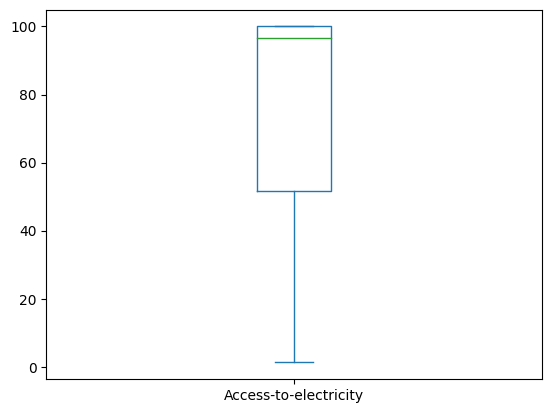

In [18]:
df2_sans_val_manquantes["Access-to-electricity"].plot(kind="box")
plt.show()

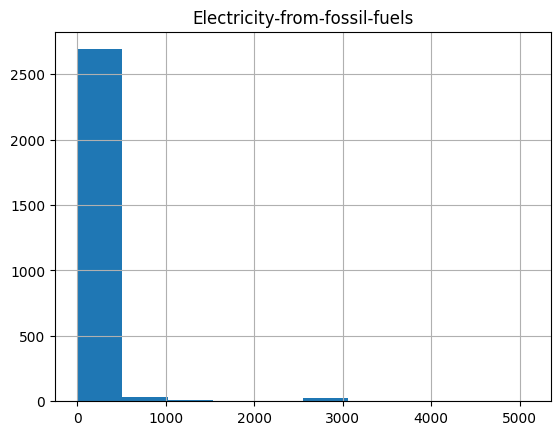

In [19]:
df3=df2_sans_val_manquantes

# autre type d'analyse descriptive de variavle qualitative
df3["Electricity-from-fossil-fuels"].hist()
plt.title("Electricity-from-fossil-fuels")
plt.show()
# nous remarquons que cette variable possède bcp de données entre 0 et 500 TWh

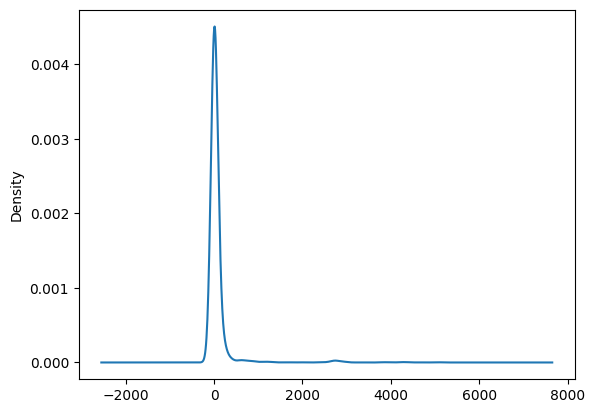

In [20]:
df2_sans_val_manquantes["Electricity-from-fossil-fuels"].plot(kind="density")
plt.show()

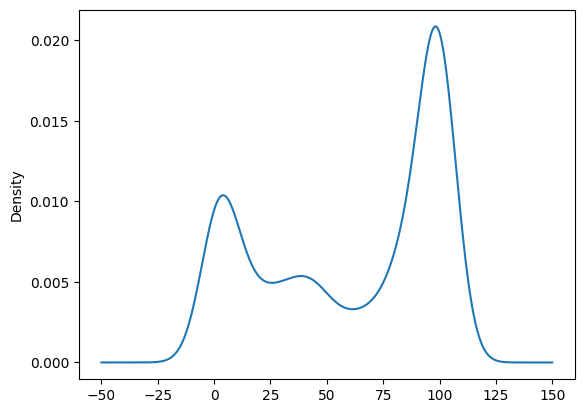

In [21]:
df3["Access-to-clean-fuels-for-cooking"].plot(kind="density")
plt.show()
# Cette variable nécessite une transformation

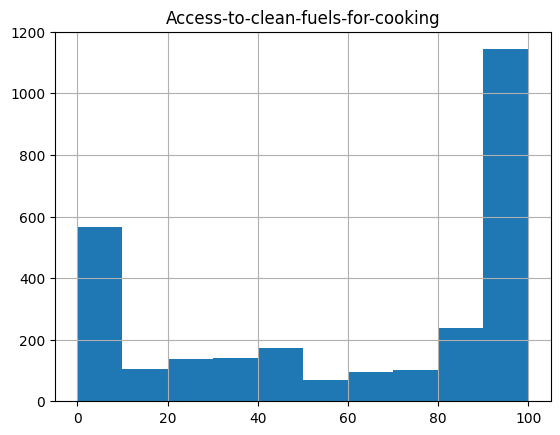

In [22]:
df3["Access-to-clean-fuels-for-cooking"].hist()
plt.title("Access-to-clean-fuels-for-cooking")
plt.show()

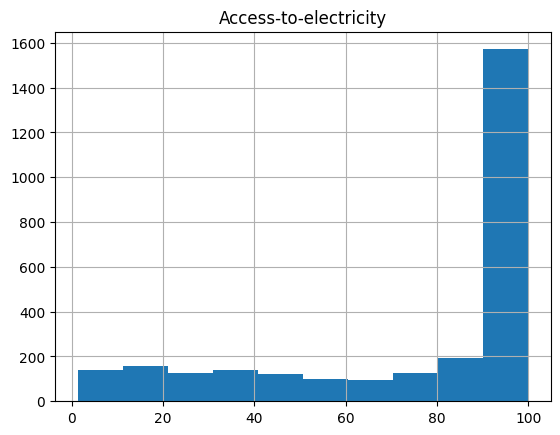

In [23]:
df3["Access-to-electricity"].hist()
plt.title("Access-to-electricity")
plt.show()

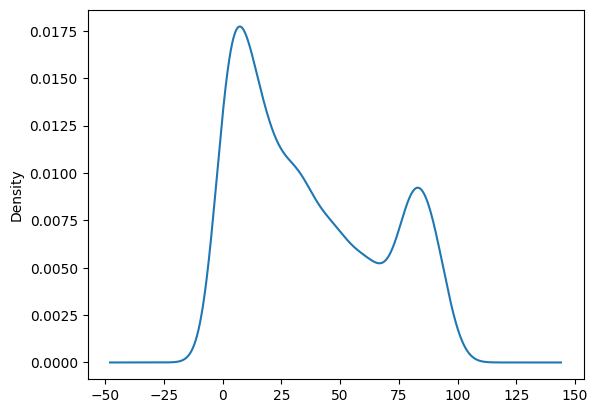

In [25]:
df3["Renewable-energy-share-in-the-total-final-energy-consumption"].plot(kind="density")
plt.show()


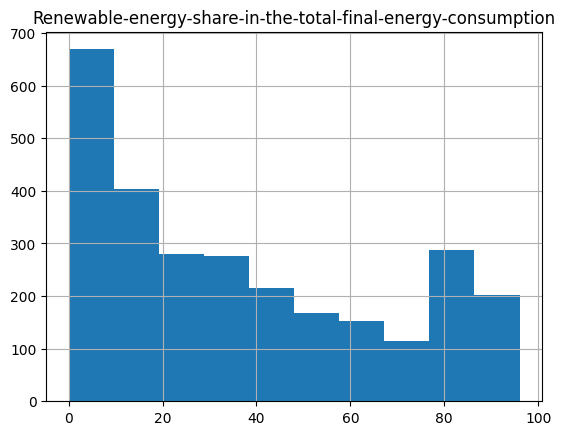

In [26]:
df3["Renewable-energy-share-in-the-total-final-energy-consumption"].hist()
plt.title("Renewable-energy-share-in-the-total-final-energy-consumption")
plt.show()

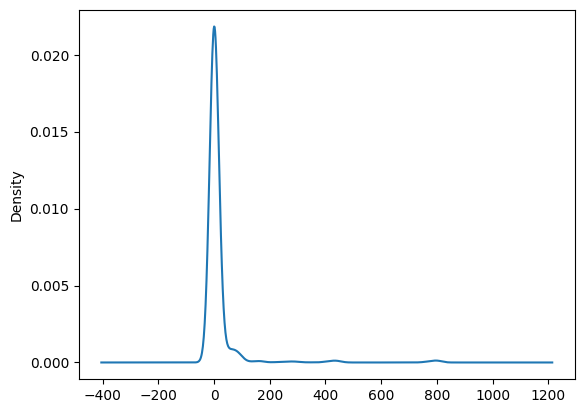

In [27]:
df3["Electricity-from-nuclear"].plot(kind="density")
plt.show()
#transfo en log

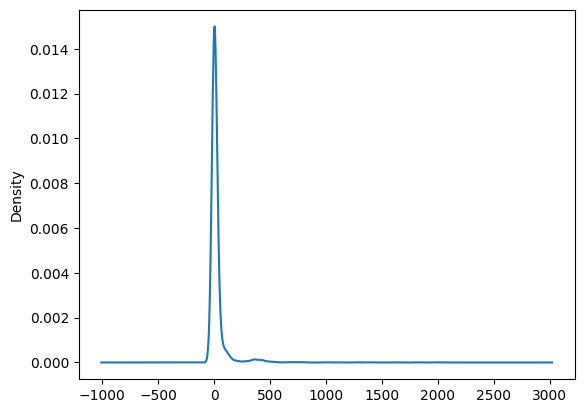

In [28]:
df3["Electricity-from-renewables"].plot(kind="density")
plt.show()
#transfo en log

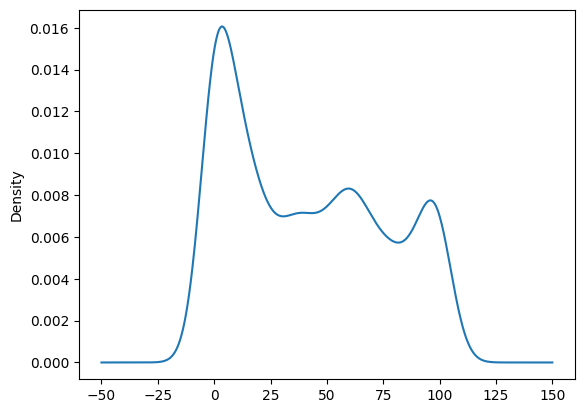

In [29]:
df3["Low-carbon-electricity"].plot(kind="density")
plt.show()


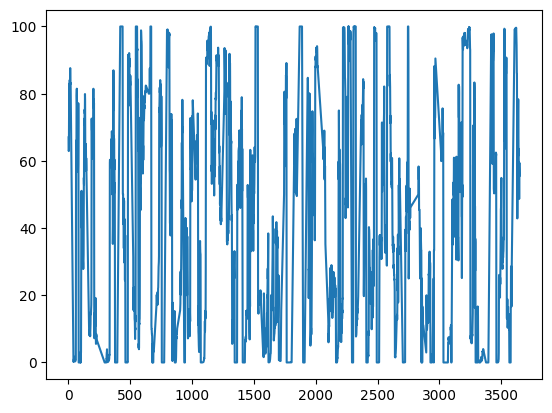

In [30]:
plt.plot(df3["Low-carbon-electricity"] )
plt.show()

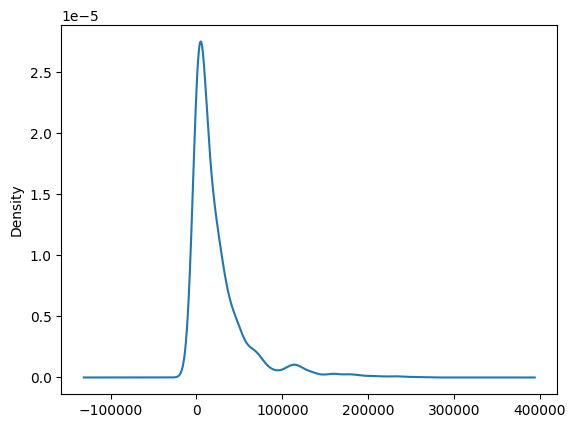

C:\Users\aboui\AppData\Local\Temp\ipykernel_61580\1477840997.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df3["Primary-energy-consumption-per-capita"].plot(kind="density")
plt.show()
#transfo en log
from math import sqrt, log
df3["Primary-energy-consumption-per-capita-new"]=df3["Primary-energy-consumption-per-capita"].map(lambda x: log(x))
del df["Primary-energy-consumption-per-capita"]

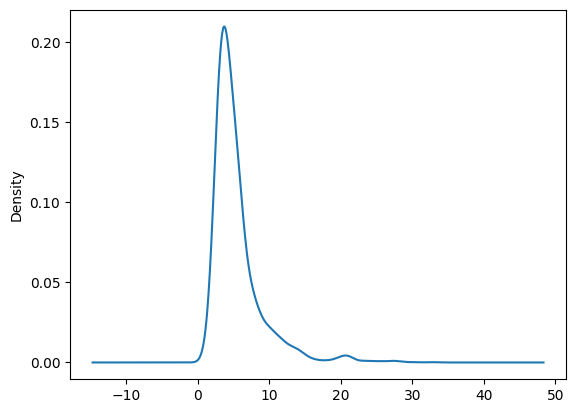

In [36]:
df3["Energy-intensity-level-of-primary-energy"].plot(kind="density")
plt.show()

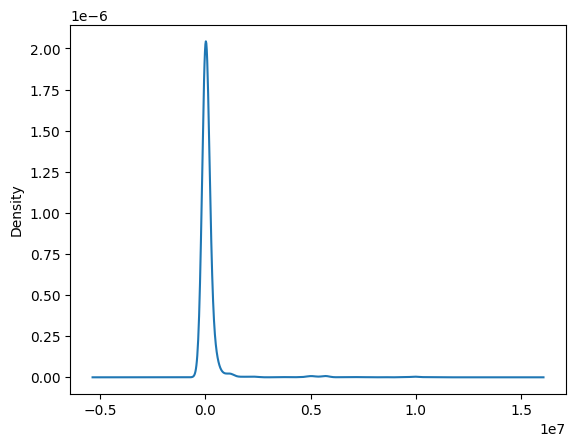

C:\Users\aboui\AppData\Local\Temp\ipykernel_61580\4209459688.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: 'Value_co2_emissions_kt_by_country'

In [35]:
df3["Value_co2_emissions_kt_by_country"].plot(kind="density")
plt.show()
df3["Value_co2_emissions_kt_by_country_new"]=df3["Value_co2_emissions_kt_by_country"].map(lambda x: log(x))
del df3["Value_co2_emissions_kt_by_country"]



In [39]:
del df3["Value_co2_emissions_kt_by_country"]

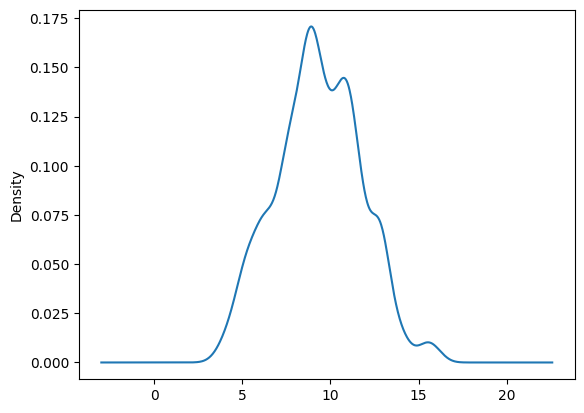

In [36]:
df3["Value_co2_emissions_kt_by_country_new"].plot(kind="density")
plt.show()

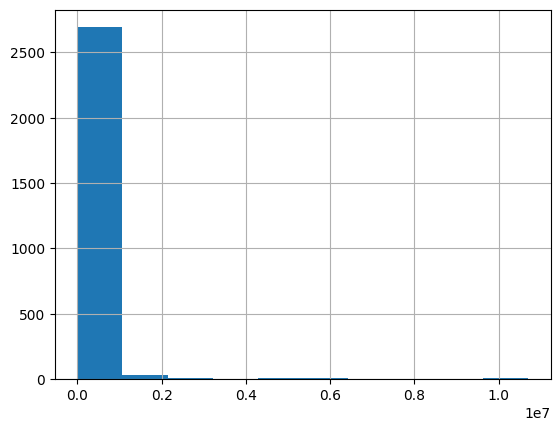

In [37]:
df3["Value_co2_emissions_kt_by_country"].hist()
plt.show()


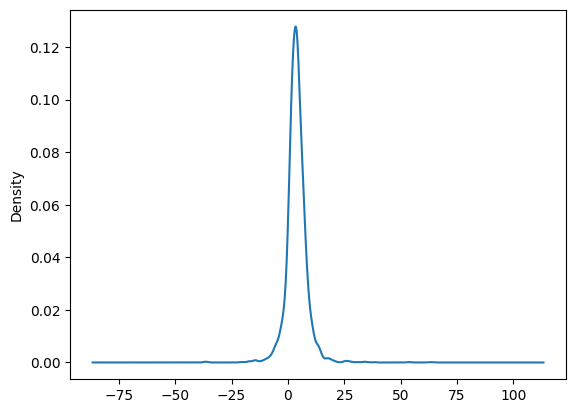

In [38]:
df3["gdp_growth"].plot(kind="density")
plt.show()


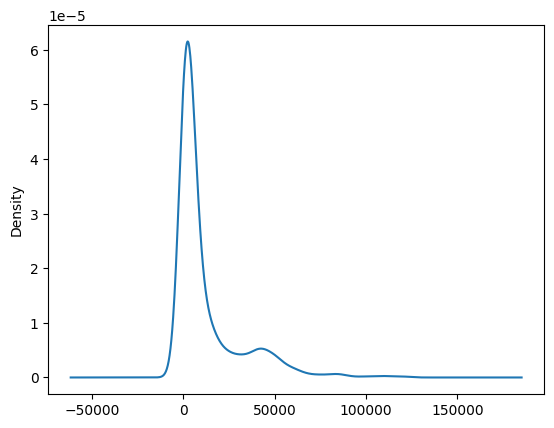

In [42]:
df3["gdp_per_capita"].plot(kind="density")
plt.show()
#transfo en log

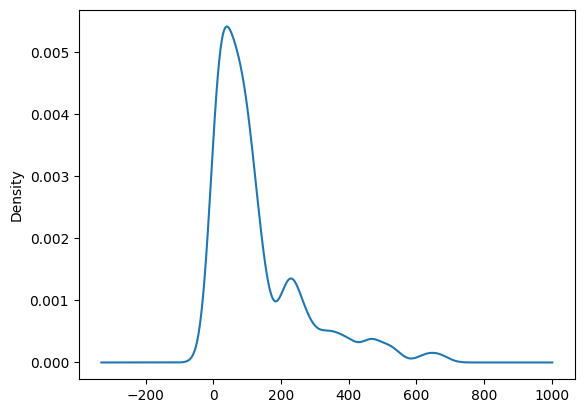

In [106]:
df3["Density.n.P.Km2"].plot(kind="density")
plt.show()

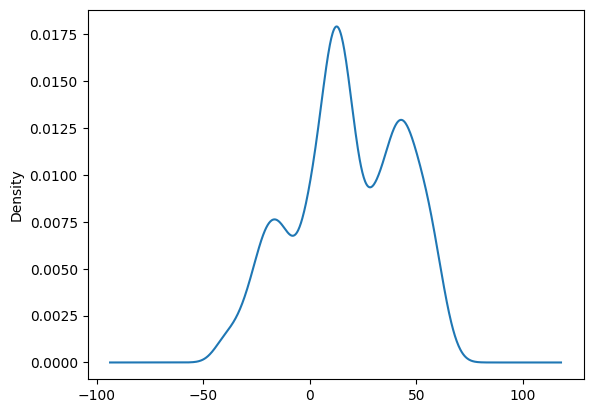

In [109]:
df3["Latitude"].plot(kind="density")
plt.show()
#nécessite une transformation

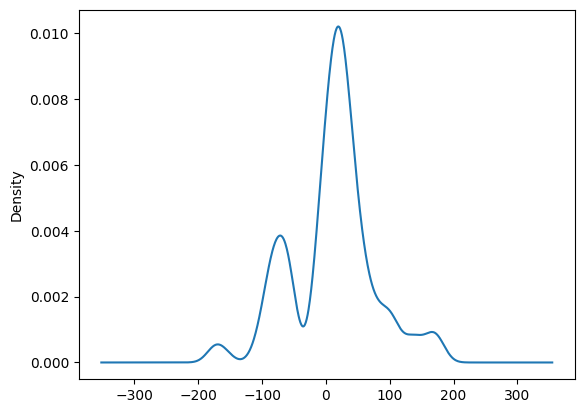

In [110]:
df3["Longitude"].plot(kind="density")
plt.show()

In [43]:
df3=df2_sans_val_manquantes

Nous avons pu transformer nos variables, avec quelques transformations log.

## Observation des emissions de CO2 par pays

Nous pouvons observer les 10 plus grandes émissions de CO2

In [50]:
df3.rename(columns={"Value_co2_emissions_kt_by_country_new":"CO2" } , inplace=True)

C:\Users\aboui\AppData\Local\Temp\ipykernel_61580\1342635586.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
CO2_grand = df3['CO2'].nlargest(10)
pays_CO2_grand=df3.loc[CO2_grand.index]['Entity']

On se propose de visualiser les localisations des 10 plus grandes émissions. 

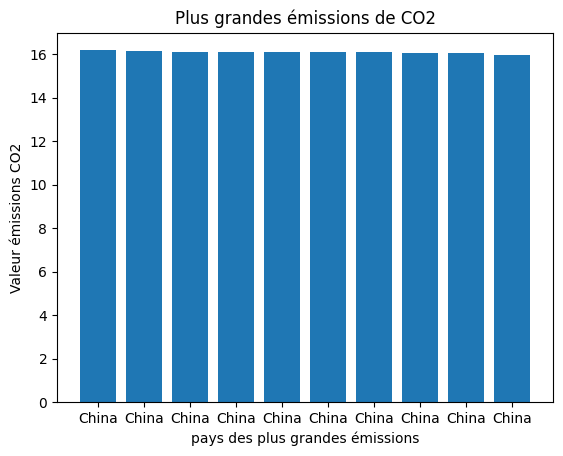

In [53]:
plt.figure()
plt.bar(range(len(CO2_grand)), CO2_grand)
plt.title("Plus grandes émissions de CO2")
plt.xlabel("pays des plus grandes émissions")
plt.ylabel("Valeur émissions CO2")
plt.xticks(range(len(CO2_grand)), pays_CO2_grand)
plt.show()

Après avoir observé les positions des 10 plus grandes émissions, nous voulons observer les 5 pays les plus émetteurs en CO2.

In [57]:
CO2_max = df3.groupby('Entity')['CO2'].max().reset_index()
CO2_max = CO2_max.sort_values(by='CO2', ascending=False)

CO2_max5=CO2_max.head(5)

fig = px.bar(
    CO2_max5,  
    x='Entity',  
    y='CO2',  
    color='CO2',  
    title='Top 5 des pays ayant le plus emis de CO2',  
    labels={'Country': 'Pays', 'CO2': 'Emissions CO2'},  
    template='plotly_white'  
)

fig.show()

C:\Users\aboui\AppData\Local\Temp\ipykernel_61580\1853001076.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [64]:
df3.columns

Index(['Entity', 'Year', 'Access-to-electricity',
       'Access-to-clean-fuels-for-cooking',
       'Renewable-energy-share-in-the-total-final-energy-consumption',
       'Electricity-from-fossil-fuels', 'Electricity-from-nuclear',
       'Electricity-from-renewables', 'Low-carbon-electricity',
       'Primary-energy-consumption-per-capita',
       'Energy-intensity-level-of-primary-energy', 'gdp_growth',
       'gdp_per_capita', 'Density.n.P.Km2', 'Land-Area', 'Latitude',
       'Longitude', 'Primary-energy-consumption-per-capita-new', 'CO2'],
      dtype='object')

In [66]:
df3.dtypes

Entity                                                          category
Year                                                            category
Access-to-electricity                                            float64
Access-to-clean-fuels-for-cooking                                float64
Renewable-energy-share-in-the-total-final-energy-consumption     float64
Electricity-from-fossil-fuels                                    float64
Electricity-from-nuclear                                         float64
Electricity-from-renewables                                      float64
Low-carbon-electricity                                           float64
Primary-energy-consumption-per-capita                            float64
Energy-intensity-level-of-primary-energy                         float64
gdp_growth                                                       float64
gdp_per_capita                                                   float64
Density.n.P.Km2                                    

Plus classiquement, on peut le faire avec un plt.bar mais je trouve ça plus joli.

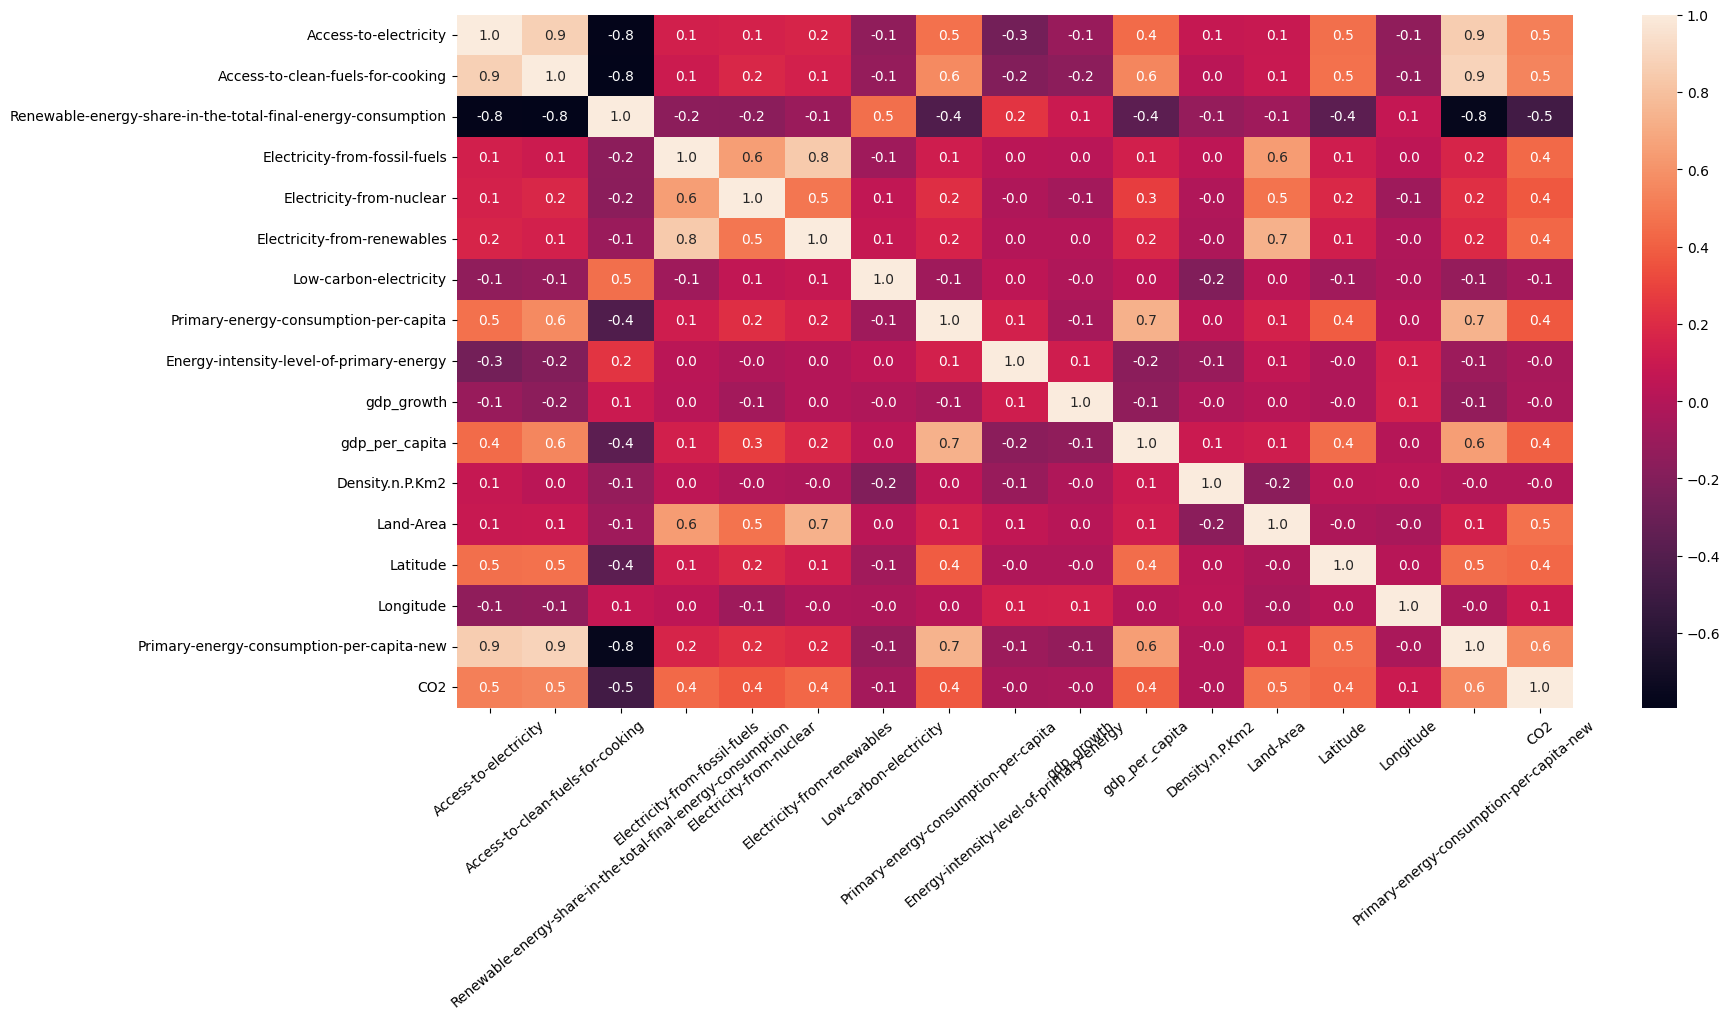

In [68]:
plt.figure(figsize=(18,9))

cols=[ 'Access-to-electricity',
       'Access-to-clean-fuels-for-cooking',
       'Renewable-energy-share-in-the-total-final-energy-consumption',
       'Electricity-from-fossil-fuels', 'Electricity-from-nuclear',
       'Electricity-from-renewables', 'Low-carbon-electricity',
       'Primary-energy-consumption-per-capita',
       'Energy-intensity-level-of-primary-energy', 'gdp_growth',
       'gdp_per_capita', 'Density.n.P.Km2', 'Land-Area', 'Latitude',
       'Longitude', 'Primary-energy-consumption-per-capita-new', 'CO2']

# correlation between columns
sns.heatmap(df3[cols].corr(), annot=True, fmt='.1f')
plt.xticks(rotation=40)

plt.show()